In [1]:
# Cheking the version of the tesorflow and keras and other libraries
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import sklearn 

2.1.0 2.2.4-tf


## Building an Image Classifier Using the Sequential API

In [2]:
# using the digits mnist dataset from keras
digits_mnist = keras.datasets.mnist
(X_train , y_train ) , (X_test, y_test) = digits_mnist.load_data()

In [3]:
# Shape of the dataset and its type
X_train.shape , X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
# Now a single image is consists of an 28x28 array where each pixel is either represented with an 
# pixel density of 0 as black and 255 as white.. since we are going to use gradient descent we have 
# to scale the input feautures by diving them by 255
len(X_test[0])

28

In [5]:
# Scaling the data to of 0 to 255 to 0 to 1 by dividing it by 255
X_train ,  X_test = X_train/255 ,  X_test/255

In [6]:
# Writing the class_name for each output
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']
class_names

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

In [7]:
# Using the values of target variables as index for 
class_names[y_train[0]], y_train[0]

('five', 5)

In [8]:
# BUilding an sequential API model (A Classification MLP with tow hidden layers)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # adding the input layer
model.add(keras.layers.Dense(300, activation='relu')) # Adding the first hidden layer
model.add(keras.layers.Dense(100, activation='relu')) # Adding the second hidden layer
model.add(keras.layers.Dense(10, activation='softmax')) # Adding the final output layer having the softmax as the activation system for the classification problem


### Explanation
* Sequential model is the simplest model in keras for neural networks , just composed of single stack of layers connected squentially called Sequential API
* Flatten is used to convert the each input pixel in the 28x28 to one single array (i.e X.reshape(-1,1)
* Dense is the hidden layer with 300 neurons 
#### Note : You can even pass them on as a string

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
#  Extracting the weigths and biases of the hidden layers
hidden1 = model.layers[1] # Extracting info about the first layer
weights , biases = hidden1.get_weights()
# Notice at first the weights are assigned randomly to each neuron to break the symmetry
weights , weights.shape

(array([[-0.01066726,  0.03337234,  0.04074413, ...,  0.01031884,
          0.00078474,  0.00863229],
        [-0.00483905,  0.06965329,  0.05934672, ..., -0.04837134,
          0.02393696,  0.03967855],
        [ 0.07332075,  0.04683173, -0.0599371 , ..., -0.00299703,
         -0.01253302,  0.06457785],
        ...,
        [ 0.06573886, -0.01470464,  0.00056303, ...,  0.07244097,
          0.03023527, -0.06934246],
        [ 0.03579719,  0.00389159, -0.02827678, ..., -0.04895887,
          0.06642489,  0.07251404],
        [-0.05407833, -0.02319343,  0.02508876, ..., -0.05169282,
         -0.0061086 , -0.02059001]], dtype=float32),
 (784, 300))

In [11]:
# All the biases are initialized to zero
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

### Compiling the model
* After the model is created , you must call compile() . to spcify the loss function ans the optimizer to use. and other metrics to compute during the training and evaluation.


In [12]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

### Explanation
* `sparse_categorical_crossentropy` - loss is used coz we have sparse labels , for each instance there is just one target index from 0 to 9 in this case . and the classes are exclusive.
* IF we had one hot encoded vectors ex.[0,0,0,1,0,...] to represent class 3 then we had to use  `"categorical_crossentropy"` loss instead
* For binary classification with more than one binary labels . we use `sigmoid` i.e logistic activation in the output intead of the "softmax" activitation function , `binary_crossentropy` loss instead 

In [13]:
### `sgd` -> Stochastic Gradient Descent and the learning rate is defaulted to lr=0.01 

In [14]:
def plot_loss_analysis(history):
    plt.style.use('ggplot')
    pd.DataFrame(history.history).plot(figsize=(8,6))
    plt.title('The mean training loss and accuracy at each epoch')
    plt.xlabel('EPOCH(Iteration)')
    plt.grid(True)
    plt.gca().set_ylim(0,1) # Set the vertical range to [0-1]
    plt.show()

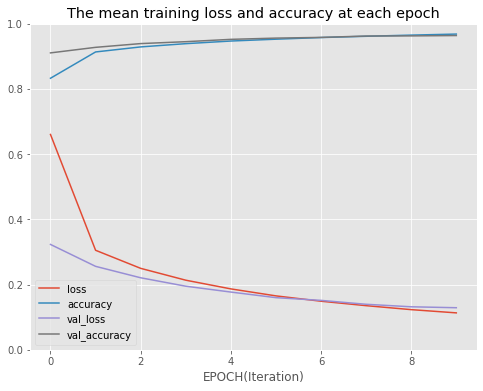

In [27]:
## Training and evaluating the model
# Call back for saving the best model 
checkpoint_cb_best_model = keras.callbacks.ModelCheckpoint('Digits_Sequantial_API.h5',
                                                              save_best_only=True)

# Early stopping the model , if validation accuracy does not see any improvement 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

# This stops the algorithm if its accuracy does not increase at a patience threhold of 10 
history = model.fit(X_train, y_train, epochs=10,
                   validation_split=0.2,
                   callbacks=[checkpoint_cb_best_model, early_stopping_cb],
                   batch_size=32)

#  Instead of creating a validation data and passing it other wise we could also set the 
# validation_split=0.1 (10%) tell keras to use 10% of the data for validation
# class_weight gives more weight to underpresent clasees and vice versa
# Use batch_size to change the number of samples per gradient descent default = 32
# Using history parameter
plot_loss_analysis(history)

In [16]:
## Evaluating the model on the test data
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 161us/sample - loss: 0.1239 - accuracy: 0.9636


[0.1239378461457789, 0.9636]

### Hyper Parameter Tuning
Using sklearn wrapper in keras module to use randomizedSearchCV to find the best parameter

In [22]:
# Creating a build model fucntion to create the base for the sklearn wrapper 
def build_model(n_layers = 2, n_neurons=100 , 
                learning_rate = 3e-3 , input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    for layer in range(n_layers):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [25]:
# Creating a keras classifier using build_model function
keras_classfier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

# Now this can be used like a normal sklearn object
# Testing the created object
keras_classfier.fit(X_train, y_train,
                   epochs=5,
                   callbacks=[checkpoint_cb_best_model, early_stopping_cb],
                   validation_split=0.2,
                   batch_size=100)
classfier_test = keras_classfier.score(X_test, y_test)
classfier_test

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 43us/sample - loss: 1.9669 - accuracy: 0.3900 - val_loss: 1.5567 - val_accuracy: 0.7002
Epoch 2/5
48000/48000 [==============================] - 2s 36us/sample - loss: 1.2180 - accuracy: 0.7570 - val_loss: 0.9042 - val_accuracy: 0.8127
Epoch 3/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.7884 - accuracy: 0.8183 - val_loss: 0.6443 - val_accuracy: 0.8502
Epoch 4/5
48000/48000 [==============================] - 2s 34us/sample - loss: 0.6141 - accuracy: 0.8474 - val_loss: 0.5288 - val_accuracy: 0.8664
Epoch 5/5
10000/10000 [==============================] - 1s 91us/sample - loss: 0.4655 - accuracy: 0.8796


0.8796

In [28]:
# Using a RandomizedSearchCV method to find the optimal parameter of the neural network
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribution = {
    "n_layers" : [1, 2, 3, 4, 5],
    "n_neurons" : np.arange(30,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_classfier, param_distribution, n_iter=10,
                                         cv=3)
rnd_search_cv.fit(X_train, y_train,
                        epochs=100,
                        callbacks=[checkpoint_cb_best_model, early_stopping_cb],
                        validation_split = 0.2,
                        batch_size = 100)
rnd_search_cv.best_params_ ,  rnd_search_cv.best_score_ 

Train on 32000 samples, validate on 8000 samples
Epoch 1/100
32000/32000 [==============================] - 1s 45us/sample - loss: 2.1530 - accuracy: 0.3081 - val_loss: 1.8730 - val_accuracy: 0.5546
Epoch 2/100
32000/32000 [==============================] - 1s 34us/sample - loss: 1.4319 - accuracy: 0.6822 - val_loss: 0.9638 - val_accuracy: 0.8050
Epoch 3/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.7941 - accuracy: 0.8051 - val_loss: 0.5902 - val_accuracy: 0.8614
Epoch 4/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.5739 - accuracy: 0.8489 - val_loss: 0.4589 - val_accuracy: 0.8814
Epoch 5/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.4804 - accuracy: 0.8685 - val_loss: 0.3971 - val_accuracy: 0.8930
Epoch 6/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.4290 - accuracy: 0.8806 - val_loss: 0.3608 - val_accuracy: 0.9019
Epoch 7/100
32000/32000 [==========================

Epoch 55/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.1461 - accuracy: 0.9575 - val_loss: 0.1532 - val_accuracy: 0.9550
Epoch 56/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.1438 - accuracy: 0.9582 - val_loss: 0.1561 - val_accuracy: 0.9546
Epoch 57/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1421 - accuracy: 0.9592 - val_loss: 0.1499 - val_accuracy: 0.9572
Epoch 58/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1402 - accuracy: 0.9592 - val_loss: 0.1479 - val_accuracy: 0.9570
Epoch 59/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.1383 - accuracy: 0.9597 - val_loss: 0.1467 - val_accuracy: 0.9576
Epoch 60/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1363 - accuracy: 0.9608 - val_loss: 0.1462 - val_accuracy: 0.9580
Epoch 61/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1346 - ac

32000/32000 [==============================] - 1s 32us/sample - loss: 0.3873 - accuracy: 0.8924 - val_loss: 0.3391 - val_accuracy: 0.9069
Epoch 9/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.3657 - accuracy: 0.8974 - val_loss: 0.3239 - val_accuracy: 0.9118
Epoch 10/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.3484 - accuracy: 0.9017 - val_loss: 0.3096 - val_accuracy: 0.9139
Epoch 11/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3334 - accuracy: 0.9053 - val_loss: 0.2986 - val_accuracy: 0.9156
Epoch 12/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3215 - accuracy: 0.9085 - val_loss: 0.2892 - val_accuracy: 0.9189
Epoch 13/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.3106 - accuracy: 0.9118 - val_loss: 0.2807 - val_accuracy: 0.9201
Epoch 14/100
32000/32000 [==============================] - 1s 40us/sample - loss: 0.3008 - accuracy: 0.9145

32000/32000 [==============================] - 1s 35us/sample - loss: 0.1234 - accuracy: 0.9645 - val_loss: 0.1472 - val_accuracy: 0.9569
Epoch 63/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.1218 - accuracy: 0.9654 - val_loss: 0.1438 - val_accuracy: 0.9580
Epoch 64/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1198 - accuracy: 0.9661 - val_loss: 0.1446 - val_accuracy: 0.9578
Epoch 65/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1184 - accuracy: 0.9665 - val_loss: 0.1445 - val_accuracy: 0.9592
Epoch 66/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1169 - accuracy: 0.9671 - val_loss: 0.1420 - val_accuracy: 0.9597
Epoch 67/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.1151 - accuracy: 0.9669 - val_loss: 0.1426 - val_accuracy: 0.9574
Epoch 68/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.1138 - accuracy: 0.968

32000/32000 [==============================] - 1s 30us/sample - loss: 0.2888 - accuracy: 0.9177 - val_loss: 0.2999 - val_accuracy: 0.9131
Epoch 16/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2807 - accuracy: 0.9201 - val_loss: 0.2937 - val_accuracy: 0.9144
Epoch 17/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.2735 - accuracy: 0.9220 - val_loss: 0.2860 - val_accuracy: 0.9181
Epoch 18/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2665 - accuracy: 0.9239 - val_loss: 0.2787 - val_accuracy: 0.9196
Epoch 19/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2601 - accuracy: 0.9259 - val_loss: 0.2734 - val_accuracy: 0.9200
Epoch 20/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2540 - accuracy: 0.9269 - val_loss: 0.2674 - val_accuracy: 0.9220
Epoch 21/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2477 - accuracy: 0.929

32000/32000 [==============================] - 1s 36us/sample - loss: 0.1094 - accuracy: 0.9687 - val_loss: 0.1538 - val_accuracy: 0.9535
Epoch 70/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1080 - accuracy: 0.9692 - val_loss: 0.1533 - val_accuracy: 0.9544
Epoch 71/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1063 - accuracy: 0.9699 - val_loss: 0.1524 - val_accuracy: 0.9531
Epoch 72/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1048 - accuracy: 0.9705 - val_loss: 0.1519 - val_accuracy: 0.9544
Epoch 73/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1035 - accuracy: 0.9707 - val_loss: 0.1515 - val_accuracy: 0.9546
Epoch 74/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1021 - accuracy: 0.9712 - val_loss: 0.1492 - val_accuracy: 0.9553
Epoch 75/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.1012 - accuracy: 0.971

32000/32000 [==============================] - 1s 29us/sample - loss: 0.4641 - accuracy: 0.8737 - val_loss: 0.4122 - val_accuracy: 0.8923
Epoch 23/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.4541 - accuracy: 0.8756 - val_loss: 0.4033 - val_accuracy: 0.8946
Epoch 24/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.4450 - accuracy: 0.8774 - val_loss: 0.3952 - val_accuracy: 0.8963
Epoch 25/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.4366 - accuracy: 0.8788 - val_loss: 0.3884 - val_accuracy: 0.8972
Epoch 26/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.4291 - accuracy: 0.8813 - val_loss: 0.3816 - val_accuracy: 0.8982
Epoch 27/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.4220 - accuracy: 0.8824 - val_loss: 0.3754 - val_accuracy: 0.8991
Epoch 28/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.4155 - accuracy: 0.883

32000/32000 [==============================] - 1s 37us/sample - loss: 0.2899 - accuracy: 0.9170 - val_loss: 0.2635 - val_accuracy: 0.9245
Epoch 77/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.2887 - accuracy: 0.9169 - val_loss: 0.2625 - val_accuracy: 0.9247
Epoch 78/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.2874 - accuracy: 0.9172 - val_loss: 0.2613 - val_accuracy: 0.9254
Epoch 79/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.2862 - accuracy: 0.9180 - val_loss: 0.2602 - val_accuracy: 0.9254
Epoch 80/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.2849 - accuracy: 0.9183 - val_loss: 0.2592 - val_accuracy: 0.9260
Epoch 81/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.2837 - accuracy: 0.9187 - val_loss: 0.2584 - val_accuracy: 0.9254
Epoch 82/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.2825 - accuracy: 0.918

32000/32000 [==============================] - 1s 32us/sample - loss: 0.4121 - accuracy: 0.8870 - val_loss: 0.3656 - val_accuracy: 0.9024
Epoch 30/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.4055 - accuracy: 0.8886 - val_loss: 0.3598 - val_accuracy: 0.9035
Epoch 31/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.3993 - accuracy: 0.8896 - val_loss: 0.3546 - val_accuracy: 0.9045
Epoch 32/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3936 - accuracy: 0.8911 - val_loss: 0.3498 - val_accuracy: 0.9059
Epoch 33/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.3882 - accuracy: 0.8929 - val_loss: 0.3450 - val_accuracy: 0.9056
Epoch 34/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.3831 - accuracy: 0.8940 - val_loss: 0.3409 - val_accuracy: 0.9062
Epoch 35/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.3784 - accuracy: 0.895

32000/32000 [==============================] - 1s 31us/sample - loss: 0.2754 - accuracy: 0.9216 - val_loss: 0.2537 - val_accuracy: 0.9274
Epoch 84/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.2743 - accuracy: 0.9222 - val_loss: 0.2526 - val_accuracy: 0.9268
Epoch 85/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2731 - accuracy: 0.9226 - val_loss: 0.2516 - val_accuracy: 0.9273
Epoch 86/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.2719 - accuracy: 0.9227 - val_loss: 0.2508 - val_accuracy: 0.9274
Epoch 87/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.2708 - accuracy: 0.9236 - val_loss: 0.2499 - val_accuracy: 0.9280
Epoch 88/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2697 - accuracy: 0.9236 - val_loss: 0.2491 - val_accuracy: 0.9287
Epoch 89/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2686 - accuracy: 0.923

32000/32000 [==============================] - 1s 29us/sample - loss: 0.3788 - accuracy: 0.8949 - val_loss: 0.3823 - val_accuracy: 0.8934
Epoch 37/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.3747 - accuracy: 0.8965 - val_loss: 0.3784 - val_accuracy: 0.8935
Epoch 38/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.3707 - accuracy: 0.8970 - val_loss: 0.3750 - val_accuracy: 0.8942
Epoch 39/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.3671 - accuracy: 0.8982 - val_loss: 0.3716 - val_accuracy: 0.8959
Epoch 40/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.3635 - accuracy: 0.8987 - val_loss: 0.3685 - val_accuracy: 0.8965
Epoch 41/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.3601 - accuracy: 0.8993 - val_loss: 0.3652 - val_accuracy: 0.8975
Epoch 42/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3570 - accuracy: 0.900

32000/32000 [==============================] - 1s 31us/sample - loss: 0.2744 - accuracy: 0.9235 - val_loss: 0.2895 - val_accuracy: 0.9171
Epoch 91/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2734 - accuracy: 0.9235 - val_loss: 0.2886 - val_accuracy: 0.9178
Epoch 92/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2723 - accuracy: 0.9237 - val_loss: 0.2875 - val_accuracy: 0.9176
Epoch 93/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2713 - accuracy: 0.9237 - val_loss: 0.2865 - val_accuracy: 0.9172
Epoch 94/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2702 - accuracy: 0.9240 - val_loss: 0.2856 - val_accuracy: 0.9183
Epoch 95/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2692 - accuracy: 0.9247 - val_loss: 0.2849 - val_accuracy: 0.9185
Epoch 96/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2682 - accuracy: 0.924

32000/32000 [==============================] - 1s 31us/sample - loss: 0.2519 - accuracy: 0.9289 - val_loss: 0.2325 - val_accuracy: 0.9337
Epoch 44/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.2497 - accuracy: 0.9296 - val_loss: 0.2311 - val_accuracy: 0.9339
Epoch 45/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.2477 - accuracy: 0.9299 - val_loss: 0.2291 - val_accuracy: 0.9351
Epoch 46/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.2456 - accuracy: 0.9307 - val_loss: 0.2276 - val_accuracy: 0.9356
Epoch 47/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.2435 - accuracy: 0.9312 - val_loss: 0.2261 - val_accuracy: 0.9370
Epoch 48/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2416 - accuracy: 0.9321 - val_loss: 0.2246 - val_accuracy: 0.9385
Epoch 49/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2398 - accuracy: 0.932

32000/32000 [==============================] - 1s 30us/sample - loss: 0.1743 - accuracy: 0.9504 - val_loss: 0.1721 - val_accuracy: 0.9524
Epoch 98/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.1733 - accuracy: 0.9510 - val_loss: 0.1711 - val_accuracy: 0.9525
Epoch 99/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.1723 - accuracy: 0.9512 - val_loss: 0.1711 - val_accuracy: 0.9528
Epoch 100/100
20000/20000 [==============================] - 1s 56us/sample - loss: 0.1925 - accuracy: 0.9438
Train on 32000 samples, validate on 8000 samples
Epoch 1/100
32000/32000 [==============================] - 1s 41us/sample - loss: 1.7529 - accuracy: 0.5063 - val_loss: 1.2346 - val_accuracy: 0.7621
Epoch 2/100
32000/32000 [==============================] - 1s 30us/sample - loss: 1.0126 - accuracy: 0.7860 - val_loss: 0.7837 - val_accuracy: 0.8443
Epoch 3/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.7325 - accuracy: 

32000/32000 [==============================] - 1s 29us/sample - loss: 0.2388 - accuracy: 0.9333 - val_loss: 0.2259 - val_accuracy: 0.9365
Epoch 51/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.2368 - accuracy: 0.9339 - val_loss: 0.2247 - val_accuracy: 0.9365
Epoch 52/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.2351 - accuracy: 0.9344 - val_loss: 0.2235 - val_accuracy: 0.9376
Epoch 53/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.2334 - accuracy: 0.9349 - val_loss: 0.2220 - val_accuracy: 0.9384
Epoch 54/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2316 - accuracy: 0.9357 - val_loss: 0.2207 - val_accuracy: 0.9390
Epoch 55/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2300 - accuracy: 0.9359 - val_loss: 0.2194 - val_accuracy: 0.9385
Epoch 56/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2283 - accuracy: 0.936

32000/32000 [==============================] - 1s 31us/sample - loss: 0.7105 - accuracy: 0.8415 - val_loss: 0.6443 - val_accuracy: 0.8515
Epoch 4/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.5899 - accuracy: 0.8603 - val_loss: 0.5585 - val_accuracy: 0.8646
Epoch 5/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.5221 - accuracy: 0.8712 - val_loss: 0.5059 - val_accuracy: 0.8742
Epoch 6/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.4783 - accuracy: 0.8778 - val_loss: 0.4701 - val_accuracy: 0.8776
Epoch 7/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.4475 - accuracy: 0.8833 - val_loss: 0.4437 - val_accuracy: 0.8830
Epoch 8/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.4244 - accuracy: 0.8872 - val_loss: 0.4239 - val_accuracy: 0.8854
Epoch 9/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.4062 - accuracy: 0.8907 - va

32000/32000 [==============================] - 1s 28us/sample - loss: 0.2223 - accuracy: 0.9384 - val_loss: 0.2444 - val_accuracy: 0.9284
Epoch 58/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.2207 - accuracy: 0.9388 - val_loss: 0.2430 - val_accuracy: 0.9293
Epoch 59/100
32000/32000 [==============================] - 1s 27us/sample - loss: 0.2191 - accuracy: 0.9388 - val_loss: 0.2414 - val_accuracy: 0.9302
Epoch 60/100
32000/32000 [==============================] - 1s 27us/sample - loss: 0.2175 - accuracy: 0.9393 - val_loss: 0.2405 - val_accuracy: 0.9298
Epoch 61/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.2160 - accuracy: 0.9399 - val_loss: 0.2390 - val_accuracy: 0.9305
Epoch 62/100
32000/32000 [==============================] - 1s 27us/sample - loss: 0.2145 - accuracy: 0.9402 - val_loss: 0.2376 - val_accuracy: 0.9306
Epoch 63/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.2130 - accuracy: 0.940

32000/32000 [==============================] - 1s 37us/sample - loss: 1.4677 - accuracy: 0.6497 - val_loss: 1.3601 - val_accuracy: 0.7000
Epoch 11/100
32000/32000 [==============================] - 1s 37us/sample - loss: 1.3257 - accuracy: 0.6940 - val_loss: 1.2192 - val_accuracy: 0.7419
Epoch 12/100
32000/32000 [==============================] - 1s 39us/sample - loss: 1.1960 - accuracy: 0.7225 - val_loss: 1.0931 - val_accuracy: 0.7616
Epoch 13/100
32000/32000 [==============================] - 1s 39us/sample - loss: 1.0820 - accuracy: 0.7407 - val_loss: 0.9848 - val_accuracy: 0.7736
Epoch 14/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.9850 - accuracy: 0.7531 - val_loss: 0.8932 - val_accuracy: 0.7857
Epoch 15/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.9041 - accuracy: 0.7665 - val_loss: 0.8177 - val_accuracy: 0.7979
Epoch 16/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.8372 - accuracy: 0.777

32000/32000 [==============================] - 1s 41us/sample - loss: 0.3203 - accuracy: 0.9056 - val_loss: 0.2869 - val_accuracy: 0.9156
Epoch 65/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.3180 - accuracy: 0.9063 - val_loss: 0.2854 - val_accuracy: 0.9160
Epoch 66/100
32000/32000 [==============================] - 1s 44us/sample - loss: 0.3155 - accuracy: 0.9074 - val_loss: 0.2837 - val_accuracy: 0.9160
Epoch 67/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.3133 - accuracy: 0.9079 - val_loss: 0.2811 - val_accuracy: 0.9164
Epoch 68/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.3110 - accuracy: 0.9091 - val_loss: 0.2798 - val_accuracy: 0.9161
Epoch 69/100
32000/32000 [==============================] - 1s 42us/sample - loss: 0.3089 - accuracy: 0.9093 - val_loss: 0.2770 - val_accuracy: 0.9179
Epoch 70/100
32000/32000 [==============================] - 1s 43us/sample - loss: 0.3067 - accuracy: 0.910

32000/32000 [==============================] - 1s 33us/sample - loss: 1.1709 - accuracy: 0.7110 - val_loss: 1.0815 - val_accuracy: 0.7390
Epoch 18/100
32000/32000 [==============================] - 1s 31us/sample - loss: 1.0631 - accuracy: 0.7316 - val_loss: 0.9765 - val_accuracy: 0.7616
Epoch 19/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.9710 - accuracy: 0.7501 - val_loss: 0.8887 - val_accuracy: 0.7799
Epoch 20/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.8938 - accuracy: 0.7654 - val_loss: 0.8157 - val_accuracy: 0.7929
Epoch 21/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.8293 - accuracy: 0.7775 - val_loss: 0.7543 - val_accuracy: 0.8054
Epoch 22/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.7751 - accuracy: 0.7903 - val_loss: 0.7032 - val_accuracy: 0.8164
Epoch 23/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.7293 - accuracy: 0.800

32000/32000 [==============================] - 1s 33us/sample - loss: 0.3044 - accuracy: 0.9126 - val_loss: 0.2794 - val_accuracy: 0.9193
Epoch 72/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3020 - accuracy: 0.9128 - val_loss: 0.2776 - val_accuracy: 0.9205
Epoch 73/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.2998 - accuracy: 0.9143 - val_loss: 0.2758 - val_accuracy: 0.9216
Epoch 74/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.2976 - accuracy: 0.9147 - val_loss: 0.2739 - val_accuracy: 0.9211
Epoch 75/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.2955 - accuracy: 0.9152 - val_loss: 0.2720 - val_accuracy: 0.9212
Epoch 76/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2933 - accuracy: 0.9152 - val_loss: 0.2711 - val_accuracy: 0.9230
Epoch 77/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2912 - accuracy: 0.916

32000/32000 [==============================] - 1s 33us/sample - loss: 0.7153 - accuracy: 0.8098 - val_loss: 0.7050 - val_accuracy: 0.8108
Epoch 25/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.6788 - accuracy: 0.8174 - val_loss: 0.6716 - val_accuracy: 0.8181
Epoch 26/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.6473 - accuracy: 0.8243 - val_loss: 0.6430 - val_accuracy: 0.8250
Epoch 27/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.6197 - accuracy: 0.8303 - val_loss: 0.6158 - val_accuracy: 0.8326
Epoch 28/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.5953 - accuracy: 0.8377 - val_loss: 0.5931 - val_accuracy: 0.8366
Epoch 29/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.5736 - accuracy: 0.8426 - val_loss: 0.5717 - val_accuracy: 0.8429
Epoch 30/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.5542 - accuracy: 0.847

32000/32000 [==============================] - 1s 41us/sample - loss: 0.3047 - accuracy: 0.9126 - val_loss: 0.3172 - val_accuracy: 0.9085
Epoch 79/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.3029 - accuracy: 0.9135 - val_loss: 0.3148 - val_accuracy: 0.9105
Epoch 80/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.3011 - accuracy: 0.9139 - val_loss: 0.3131 - val_accuracy: 0.9109
Epoch 81/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.2993 - accuracy: 0.9142 - val_loss: 0.3116 - val_accuracy: 0.9099
Epoch 82/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.2977 - accuracy: 0.9151 - val_loss: 0.3102 - val_accuracy: 0.9104
Epoch 83/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.2960 - accuracy: 0.9153 - val_loss: 0.3087 - val_accuracy: 0.9091
Epoch 84/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.2944 - accuracy: 0.915

32000/32000 [==============================] - 1s 35us/sample - loss: 0.9711 - accuracy: 0.7478 - val_loss: 0.9090 - val_accuracy: 0.7691
Epoch 32/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.9385 - accuracy: 0.7542 - val_loss: 0.8770 - val_accuracy: 0.7759
Epoch 33/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.9086 - accuracy: 0.7593 - val_loss: 0.8477 - val_accuracy: 0.7826
Epoch 34/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.8811 - accuracy: 0.7644 - val_loss: 0.8206 - val_accuracy: 0.7880
Epoch 35/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.8558 - accuracy: 0.7704 - val_loss: 0.7956 - val_accuracy: 0.7926
Epoch 36/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.8326 - accuracy: 0.7754 - val_loss: 0.7730 - val_accuracy: 0.7976
Epoch 37/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.8111 - accuracy: 0.780

32000/32000 [==============================] - 1s 34us/sample - loss: 0.4410 - accuracy: 0.8776 - val_loss: 0.3942 - val_accuracy: 0.8925
Epoch 86/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.4379 - accuracy: 0.8782 - val_loss: 0.3916 - val_accuracy: 0.8934
Epoch 87/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.4351 - accuracy: 0.8790 - val_loss: 0.3890 - val_accuracy: 0.8942
Epoch 88/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.4322 - accuracy: 0.8799 - val_loss: 0.3865 - val_accuracy: 0.8944
Epoch 89/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.4295 - accuracy: 0.8804 - val_loss: 0.3835 - val_accuracy: 0.8951
Epoch 90/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.4268 - accuracy: 0.8813 - val_loss: 0.3810 - val_accuracy: 0.8954
Epoch 91/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.4241 - accuracy: 0.881

32000/32000 [==============================] - 1s 35us/sample - loss: 0.9878 - accuracy: 0.7536 - val_loss: 0.9277 - val_accuracy: 0.7822
Epoch 39/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.9521 - accuracy: 0.7630 - val_loss: 0.8919 - val_accuracy: 0.7944
Epoch 40/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.9186 - accuracy: 0.7728 - val_loss: 0.8581 - val_accuracy: 0.8031
Epoch 41/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.8871 - accuracy: 0.7814 - val_loss: 0.8268 - val_accuracy: 0.8100
Epoch 42/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.8575 - accuracy: 0.7879 - val_loss: 0.7973 - val_accuracy: 0.8166
Epoch 43/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.8296 - accuracy: 0.7947 - val_loss: 0.7697 - val_accuracy: 0.8220
Epoch 44/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.8035 - accuracy: 0.799

32000/32000 [==============================] - 1s 32us/sample - loss: 0.4056 - accuracy: 0.8824 - val_loss: 0.3648 - val_accuracy: 0.8965
Epoch 93/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.4035 - accuracy: 0.8832 - val_loss: 0.3628 - val_accuracy: 0.8985
Epoch 94/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.4013 - accuracy: 0.8838 - val_loss: 0.3611 - val_accuracy: 0.8982
Epoch 95/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.3993 - accuracy: 0.8839 - val_loss: 0.3592 - val_accuracy: 0.8986
Epoch 96/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3972 - accuracy: 0.8847 - val_loss: 0.3575 - val_accuracy: 0.8994
Epoch 97/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.3953 - accuracy: 0.8852 - val_loss: 0.3558 - val_accuracy: 0.8991
Epoch 98/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.3934 - accuracy: 0.886

32000/32000 [==============================] - 1s 33us/sample - loss: 0.7801 - accuracy: 0.7868 - val_loss: 0.7775 - val_accuracy: 0.7837
Epoch 46/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.7627 - accuracy: 0.7911 - val_loss: 0.7606 - val_accuracy: 0.7906
Epoch 47/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.7461 - accuracy: 0.7959 - val_loss: 0.7448 - val_accuracy: 0.7956
Epoch 48/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.7305 - accuracy: 0.8005 - val_loss: 0.7293 - val_accuracy: 0.7990
Epoch 49/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.7156 - accuracy: 0.8043 - val_loss: 0.7150 - val_accuracy: 0.8026
Epoch 50/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.7015 - accuracy: 0.8072 - val_loss: 0.7011 - val_accuracy: 0.8055
Epoch 51/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.6881 - accuracy: 0.811

32000/32000 [==============================] - 1s 34us/sample - loss: 0.4169 - accuracy: 0.8840 - val_loss: 0.4222 - val_accuracy: 0.8808
Epoch 100/100
20000/20000 [==============================] - 1s 66us/sample - loss: 0.4061 - accuracy: 0.8853
Train on 32000 samples, validate on 8000 samples
Epoch 1/100
32000/32000 [==============================] - 1s 44us/sample - loss: 2.2386 - accuracy: 0.1793 - val_loss: 2.1563 - val_accuracy: 0.3129
Epoch 2/100
32000/32000 [==============================] - 1s 36us/sample - loss: 2.0733 - accuracy: 0.4094 - val_loss: 1.9759 - val_accuracy: 0.5034
Epoch 3/100
32000/32000 [==============================] - 1s 32us/sample - loss: 1.8812 - accuracy: 0.5426 - val_loss: 1.7642 - val_accuracy: 0.6008
Epoch 4/100
32000/32000 [==============================] - 1s 32us/sample - loss: 1.6653 - accuracy: 0.6230 - val_loss: 1.5358 - val_accuracy: 0.6844
Epoch 5/100
32000/32000 [==============================] - 1s 36us/sample - loss: 1.4446 - accuracy: 0.

32000/32000 [==============================] - 1s 29us/sample - loss: 0.3131 - accuracy: 0.9104 - val_loss: 0.2777 - val_accuracy: 0.9200
Epoch 53/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.3110 - accuracy: 0.9113 - val_loss: 0.2760 - val_accuracy: 0.9204
Epoch 54/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.3088 - accuracy: 0.9115 - val_loss: 0.2743 - val_accuracy: 0.9216
Epoch 55/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.3068 - accuracy: 0.9120 - val_loss: 0.2729 - val_accuracy: 0.9215
Epoch 56/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.3049 - accuracy: 0.9130 - val_loss: 0.2710 - val_accuracy: 0.9220
Epoch 57/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.3029 - accuracy: 0.9131 - val_loss: 0.2695 - val_accuracy: 0.9224
Epoch 58/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.3011 - accuracy: 0.913

32000/32000 [==============================] - 1s 29us/sample - loss: 1.4479 - accuracy: 0.6702 - val_loss: 1.3101 - val_accuracy: 0.7255
Epoch 6/100
32000/32000 [==============================] - 1s 29us/sample - loss: 1.2392 - accuracy: 0.7236 - val_loss: 1.1136 - val_accuracy: 0.7716
Epoch 7/100
32000/32000 [==============================] - 1s 29us/sample - loss: 1.0689 - accuracy: 0.7621 - val_loss: 0.9579 - val_accuracy: 0.8046
Epoch 8/100
32000/32000 [==============================] - 1s 28us/sample - loss: 0.9368 - accuracy: 0.7877 - val_loss: 0.8394 - val_accuracy: 0.8229
Epoch 9/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.8363 - accuracy: 0.8060 - val_loss: 0.7495 - val_accuracy: 0.8366
Epoch 10/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.7595 - accuracy: 0.8187 - val_loss: 0.6809 - val_accuracy: 0.8487
Epoch 11/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.6998 - accuracy: 0.8288 - 

32000/32000 [==============================] - 1s 30us/sample - loss: 0.3008 - accuracy: 0.9143 - val_loss: 0.2739 - val_accuracy: 0.9245
Epoch 60/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2990 - accuracy: 0.9151 - val_loss: 0.2725 - val_accuracy: 0.9245
Epoch 61/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2973 - accuracy: 0.9153 - val_loss: 0.2710 - val_accuracy: 0.9246
Epoch 62/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2955 - accuracy: 0.9156 - val_loss: 0.2697 - val_accuracy: 0.9259
Epoch 63/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2939 - accuracy: 0.9162 - val_loss: 0.2683 - val_accuracy: 0.9256
Epoch 64/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2922 - accuracy: 0.9164 - val_loss: 0.2670 - val_accuracy: 0.9255
Epoch 65/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2907 - accuracy: 0.916

32000/32000 [==============================] - 1s 30us/sample - loss: 0.6196 - accuracy: 0.8544 - val_loss: 0.6090 - val_accuracy: 0.8584
Epoch 13/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.5839 - accuracy: 0.8598 - val_loss: 0.5765 - val_accuracy: 0.8629
Epoch 14/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.5545 - accuracy: 0.8637 - val_loss: 0.5500 - val_accuracy: 0.8656
Epoch 15/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.5299 - accuracy: 0.8676 - val_loss: 0.5271 - val_accuracy: 0.8686
Epoch 16/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.5090 - accuracy: 0.8709 - val_loss: 0.5079 - val_accuracy: 0.8724
Epoch 17/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.4910 - accuracy: 0.8739 - val_loss: 0.4911 - val_accuracy: 0.8760
Epoch 18/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.4754 - accuracy: 0.876

32000/32000 [==============================] - 1s 45us/sample - loss: 0.2867 - accuracy: 0.9195 - val_loss: 0.3051 - val_accuracy: 0.9111
Epoch 67/100
32000/32000 [==============================] - 1s 42us/sample - loss: 0.2852 - accuracy: 0.9203 - val_loss: 0.3036 - val_accuracy: 0.9119
Epoch 68/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.2837 - accuracy: 0.9207 - val_loss: 0.3026 - val_accuracy: 0.9121
Epoch 69/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.2822 - accuracy: 0.9214 - val_loss: 0.3016 - val_accuracy: 0.9125
Epoch 70/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.2809 - accuracy: 0.9208 - val_loss: 0.3003 - val_accuracy: 0.9121
Epoch 71/100
32000/32000 [==============================] - 1s 40us/sample - loss: 0.2795 - accuracy: 0.9216 - val_loss: 0.2989 - val_accuracy: 0.9133
Epoch 72/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.2780 - accuracy: 0.921

32000/32000 [==============================] - 1s 32us/sample - loss: 0.2582 - accuracy: 0.9256 - val_loss: 0.2339 - val_accuracy: 0.9320
Epoch 20/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2527 - accuracy: 0.9282 - val_loss: 0.2302 - val_accuracy: 0.9334
Epoch 21/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2479 - accuracy: 0.9292 - val_loss: 0.2267 - val_accuracy: 0.9330
Epoch 22/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2432 - accuracy: 0.9310 - val_loss: 0.2229 - val_accuracy: 0.9349
Epoch 23/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2386 - accuracy: 0.9320 - val_loss: 0.2186 - val_accuracy: 0.9364
Epoch 24/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2343 - accuracy: 0.9333 - val_loss: 0.2157 - val_accuracy: 0.9369
Epoch 25/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.2300 - accuracy: 0.934

32000/32000 [==============================] - 1s 32us/sample - loss: 0.1181 - accuracy: 0.9673 - val_loss: 0.1370 - val_accuracy: 0.9617
Epoch 74/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1168 - accuracy: 0.9683 - val_loss: 0.1367 - val_accuracy: 0.9619
Epoch 75/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1153 - accuracy: 0.9684 - val_loss: 0.1360 - val_accuracy: 0.9616
Epoch 76/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1140 - accuracy: 0.9684 - val_loss: 0.1360 - val_accuracy: 0.9616
Epoch 77/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1127 - accuracy: 0.9688 - val_loss: 0.1342 - val_accuracy: 0.9619
Epoch 78/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1117 - accuracy: 0.9693 - val_loss: 0.1331 - val_accuracy: 0.9629
Epoch 79/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1103 - accuracy: 0.970

32000/32000 [==============================] - 1s 30us/sample - loss: 0.2156 - accuracy: 0.9392 - val_loss: 0.2016 - val_accuracy: 0.9426
Epoch 27/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2117 - accuracy: 0.9400 - val_loss: 0.1997 - val_accuracy: 0.9448
Epoch 28/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.2077 - accuracy: 0.9413 - val_loss: 0.1964 - val_accuracy: 0.9463
Epoch 29/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.2044 - accuracy: 0.9423 - val_loss: 0.1928 - val_accuracy: 0.9461
Epoch 30/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.2009 - accuracy: 0.9432 - val_loss: 0.1910 - val_accuracy: 0.9471
Epoch 31/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1976 - accuracy: 0.9445 - val_loss: 0.1876 - val_accuracy: 0.9480
Epoch 32/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.1943 - accuracy: 0.946

32000/32000 [==============================] - 1s 32us/sample - loss: 0.1026 - accuracy: 0.9717 - val_loss: 0.1292 - val_accuracy: 0.9635
Epoch 81/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1014 - accuracy: 0.9717 - val_loss: 0.1289 - val_accuracy: 0.9632
Epoch 82/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1004 - accuracy: 0.9724 - val_loss: 0.1277 - val_accuracy: 0.9645
Epoch 83/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.0991 - accuracy: 0.9729 - val_loss: 0.1291 - val_accuracy: 0.9634
Epoch 84/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.0981 - accuracy: 0.9729 - val_loss: 0.1261 - val_accuracy: 0.9645
Epoch 85/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.0971 - accuracy: 0.9734 - val_loss: 0.1251 - val_accuracy: 0.9645
Epoch 86/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.0959 - accuracy: 0.973

32000/32000 [==============================] - 1s 30us/sample - loss: 0.1894 - accuracy: 0.9460 - val_loss: 0.2132 - val_accuracy: 0.9383
Epoch 34/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.1865 - accuracy: 0.9462 - val_loss: 0.2107 - val_accuracy: 0.9392
Epoch 35/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1835 - accuracy: 0.9475 - val_loss: 0.2078 - val_accuracy: 0.9404
Epoch 36/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.1804 - accuracy: 0.9481 - val_loss: 0.2066 - val_accuracy: 0.9406
Epoch 37/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.1777 - accuracy: 0.9490 - val_loss: 0.2036 - val_accuracy: 0.9406
Epoch 38/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.1749 - accuracy: 0.9495 - val_loss: 0.2023 - val_accuracy: 0.9427
Epoch 39/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.1724 - accuracy: 0.950

32000/32000 [==============================] - 1s 32us/sample - loss: 0.0914 - accuracy: 0.9747 - val_loss: 0.1416 - val_accuracy: 0.9575
Epoch 88/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.0903 - accuracy: 0.9751 - val_loss: 0.1403 - val_accuracy: 0.9589
Epoch 89/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.0892 - accuracy: 0.9753 - val_loss: 0.1394 - val_accuracy: 0.9586
Epoch 90/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.0881 - accuracy: 0.9757 - val_loss: 0.1396 - val_accuracy: 0.9590
Epoch 91/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.0874 - accuracy: 0.9761 - val_loss: 0.1390 - val_accuracy: 0.9588
Epoch 92/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.0862 - accuracy: 0.9765 - val_loss: 0.1379 - val_accuracy: 0.9590
Epoch 93/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.0852 - accuracy: 0.976

32000/32000 [==============================] - 1s 40us/sample - loss: 0.9362 - accuracy: 0.7499 - val_loss: 0.8763 - val_accuracy: 0.7794
Epoch 41/100
32000/32000 [==============================] - 1s 40us/sample - loss: 0.9038 - accuracy: 0.7569 - val_loss: 0.8441 - val_accuracy: 0.7866
Epoch 42/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.8741 - accuracy: 0.7633 - val_loss: 0.8147 - val_accuracy: 0.7944
Epoch 43/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.8468 - accuracy: 0.7689 - val_loss: 0.7874 - val_accuracy: 0.8019
Epoch 44/100
32000/32000 [==============================] - 1s 40us/sample - loss: 0.8216 - accuracy: 0.7752 - val_loss: 0.7625 - val_accuracy: 0.8050
Epoch 45/100
32000/32000 [==============================] - 1s 43us/sample - loss: 0.7984 - accuracy: 0.7807 - val_loss: 0.7398 - val_accuracy: 0.8100
Epoch 46/100
32000/32000 [==============================] - 1s 44us/sample - loss: 0.7773 - accuracy: 0.785

32000/32000 [==============================] - 1s 34us/sample - loss: 0.4244 - accuracy: 0.8825 - val_loss: 0.3813 - val_accuracy: 0.8960
Epoch 95/100
32000/32000 [==============================] - 1s 38us/sample - loss: 0.4214 - accuracy: 0.8828 - val_loss: 0.3786 - val_accuracy: 0.8974
Epoch 96/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.4184 - accuracy: 0.8838 - val_loss: 0.3757 - val_accuracy: 0.8982
Epoch 97/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.4155 - accuracy: 0.8842 - val_loss: 0.3736 - val_accuracy: 0.8979
Epoch 98/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.4127 - accuracy: 0.8852 - val_loss: 0.3710 - val_accuracy: 0.8982
Epoch 99/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.4099 - accuracy: 0.8858 - val_loss: 0.3686 - val_accuracy: 0.8992
Epoch 100/100
20000/20000 [==============================] - 1s 74us/sample - loss: 0.4081 - accuracy: 0.88

32000/32000 [==============================] - 1s 41us/sample - loss: 0.6863 - accuracy: 0.8118 - val_loss: 0.6270 - val_accuracy: 0.8379
Epoch 48/100
32000/32000 [==============================] - 1s 42us/sample - loss: 0.6661 - accuracy: 0.8163 - val_loss: 0.6077 - val_accuracy: 0.8399
Epoch 49/100
32000/32000 [==============================] - 1s 42us/sample - loss: 0.6479 - accuracy: 0.8200 - val_loss: 0.5898 - val_accuracy: 0.8468
Epoch 50/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.6314 - accuracy: 0.8233 - val_loss: 0.5744 - val_accuracy: 0.8501
Epoch 51/100
32000/32000 [==============================] - 1s 43us/sample - loss: 0.6165 - accuracy: 0.8264 - val_loss: 0.5602 - val_accuracy: 0.8528
Epoch 52/100
32000/32000 [==============================] - 1s 44us/sample - loss: 0.6029 - accuracy: 0.8301 - val_loss: 0.5469 - val_accuracy: 0.8546
Epoch 53/100
32000/32000 [==============================] - 1s 42us/sample - loss: 0.5904 - accuracy: 0.832

20000/20000 [==============================] - 2s 78us/sample - loss: 0.4016 - accuracy: 0.8850
Train on 32000 samples, validate on 8000 samples
Epoch 1/100
32000/32000 [==============================] - 2s 57us/sample - loss: 2.3105 - accuracy: 0.1060 - val_loss: 2.3052 - val_accuracy: 0.1084
Epoch 2/100
32000/32000 [==============================] - 1s 47us/sample - loss: 2.2972 - accuracy: 0.1156 - val_loss: 2.2928 - val_accuracy: 0.1201
Epoch 3/100
32000/32000 [==============================] - 1s 43us/sample - loss: 2.2850 - accuracy: 0.1315 - val_loss: 2.2811 - val_accuracy: 0.1375
Epoch 4/100
32000/32000 [==============================] - 1s 37us/sample - loss: 2.2733 - accuracy: 0.1554 - val_loss: 2.2694 - val_accuracy: 0.1708
Epoch 5/100
32000/32000 [==============================] - 1s 38us/sample - loss: 2.2613 - accuracy: 0.1920 - val_loss: 2.2571 - val_accuracy: 0.2081
Epoch 6/100
32000/32000 [==============================] - 1s 40us/sample - loss: 2.2486 - accuracy: 0.23

32000/32000 [==============================] - 1s 39us/sample - loss: 0.6508 - accuracy: 0.8060 - val_loss: 0.6448 - val_accuracy: 0.8090
Epoch 55/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.6395 - accuracy: 0.8094 - val_loss: 0.6336 - val_accuracy: 0.8121
Epoch 56/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.6286 - accuracy: 0.8124 - val_loss: 0.6230 - val_accuracy: 0.8161
Epoch 57/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.6184 - accuracy: 0.8159 - val_loss: 0.6130 - val_accuracy: 0.8190
Epoch 58/100
32000/32000 [==============================] - 1s 37us/sample - loss: 0.6086 - accuracy: 0.8195 - val_loss: 0.6036 - val_accuracy: 0.8224
Epoch 59/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.5992 - accuracy: 0.8218 - val_loss: 0.5941 - val_accuracy: 0.8254
Epoch 60/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.5902 - accuracy: 0.825

32000/32000 [==============================] - 1s 33us/sample - loss: 0.3728 - accuracy: 0.8901 - val_loss: 0.3239 - val_accuracy: 0.9071
Epoch 8/100
32000/32000 [==============================] - 1s 35us/sample - loss: 0.3536 - accuracy: 0.8962 - val_loss: 0.3087 - val_accuracy: 0.9103
Epoch 9/100
32000/32000 [==============================] - 1s 36us/sample - loss: 0.3388 - accuracy: 0.9004 - val_loss: 0.2991 - val_accuracy: 0.9130
Epoch 10/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3258 - accuracy: 0.9045 - val_loss: 0.2867 - val_accuracy: 0.9151
Epoch 11/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.3146 - accuracy: 0.9075 - val_loss: 0.2775 - val_accuracy: 0.9190
Epoch 12/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.3038 - accuracy: 0.9112 - val_loss: 0.2747 - val_accuracy: 0.9185
Epoch 13/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.2950 - accuracy: 0.9140 

32000/32000 [==============================] - 1s 32us/sample - loss: 0.1231 - accuracy: 0.9655 - val_loss: 0.1476 - val_accuracy: 0.9584
Epoch 62/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1219 - accuracy: 0.9656 - val_loss: 0.1486 - val_accuracy: 0.9595
Epoch 63/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1201 - accuracy: 0.9662 - val_loss: 0.1464 - val_accuracy: 0.9591
Epoch 64/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1187 - accuracy: 0.9660 - val_loss: 0.1475 - val_accuracy: 0.9582
Epoch 65/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1174 - accuracy: 0.9668 - val_loss: 0.1456 - val_accuracy: 0.9589
Epoch 66/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1162 - accuracy: 0.9668 - val_loss: 0.1451 - val_accuracy: 0.9596
Epoch 67/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.1146 - accuracy: 0.967

32000/32000 [==============================] - 1s 39us/sample - loss: 0.2713 - accuracy: 0.9220 - val_loss: 0.2548 - val_accuracy: 0.9246
Epoch 15/100
32000/32000 [==============================] - 1s 34us/sample - loss: 0.2633 - accuracy: 0.9242 - val_loss: 0.2471 - val_accuracy: 0.9279
Epoch 16/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.2566 - accuracy: 0.9254 - val_loss: 0.2435 - val_accuracy: 0.9298
Epoch 17/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2499 - accuracy: 0.9275 - val_loss: 0.2394 - val_accuracy: 0.9291
Epoch 18/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2432 - accuracy: 0.9301 - val_loss: 0.2337 - val_accuracy: 0.9301
Epoch 19/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.2372 - accuracy: 0.9313 - val_loss: 0.2304 - val_accuracy: 0.9331
Epoch 20/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.2312 - accuracy: 0.932

32000/32000 [==============================] - 1s 30us/sample - loss: 0.1011 - accuracy: 0.9705 - val_loss: 0.1503 - val_accuracy: 0.9596
Epoch 69/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.0999 - accuracy: 0.9712 - val_loss: 0.1507 - val_accuracy: 0.9585
Epoch 70/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.0983 - accuracy: 0.9714 - val_loss: 0.1467 - val_accuracy: 0.9589
Epoch 71/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.0977 - accuracy: 0.9716 - val_loss: 0.1485 - val_accuracy: 0.9595
Epoch 72/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.0958 - accuracy: 0.9718 - val_loss: 0.1470 - val_accuracy: 0.9594
Epoch 73/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.0945 - accuracy: 0.9731 - val_loss: 0.1468 - val_accuracy: 0.9596
Epoch 74/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.0936 - accuracy: 0.973

32000/32000 [==============================] - 1s 30us/sample - loss: 0.2046 - accuracy: 0.9413 - val_loss: 0.2336 - val_accuracy: 0.9304
Epoch 23/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.1994 - accuracy: 0.9420 - val_loss: 0.2257 - val_accuracy: 0.9336
Epoch 24/100
32000/32000 [==============================] - 1s 29us/sample - loss: 0.1944 - accuracy: 0.9436 - val_loss: 0.2253 - val_accuracy: 0.9342
Epoch 25/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1901 - accuracy: 0.9444 - val_loss: 0.2184 - val_accuracy: 0.9356
Epoch 26/100
32000/32000 [==============================] - 1s 31us/sample - loss: 0.1856 - accuracy: 0.9462 - val_loss: 0.2154 - val_accuracy: 0.9369
Epoch 27/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.1811 - accuracy: 0.9473 - val_loss: 0.2172 - val_accuracy: 0.9377
Epoch 28/100
32000/32000 [==============================] - 1s 30us/sample - loss: 0.1772 - accuracy: 0.948

32000/32000 [==============================] - 1s 41us/sample - loss: 0.0809 - accuracy: 0.9769 - val_loss: 0.1515 - val_accuracy: 0.9570
Epoch 77/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.0801 - accuracy: 0.9771 - val_loss: 0.1532 - val_accuracy: 0.9576
Epoch 78/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.0788 - accuracy: 0.9782 - val_loss: 0.1533 - val_accuracy: 0.9567
Epoch 79/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.0774 - accuracy: 0.9778 - val_loss: 0.1503 - val_accuracy: 0.9574
Epoch 80/100
32000/32000 [==============================] - 1s 40us/sample - loss: 0.0765 - accuracy: 0.9784 - val_loss: 0.1512 - val_accuracy: 0.9574
Epoch 81/100
32000/32000 [==============================] - 1s 41us/sample - loss: 0.0756 - accuracy: 0.9793 - val_loss: 0.1536 - val_accuracy: 0.9581
Epoch 82/100
32000/32000 [==============================] - 1s 39us/sample - loss: 0.0751 - accuracy: 0.978

32000/32000 [==============================] - 1s 32us/sample - loss: 0.1268 - accuracy: 0.9617 - val_loss: 0.1384 - val_accuracy: 0.9628
Epoch 13/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1176 - accuracy: 0.9637 - val_loss: 0.1325 - val_accuracy: 0.9609
Epoch 14/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1097 - accuracy: 0.9673 - val_loss: 0.1329 - val_accuracy: 0.9629
Epoch 15/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.1028 - accuracy: 0.9691 - val_loss: 0.1330 - val_accuracy: 0.9625
Epoch 16/100
32000/32000 [==============================] - 1s 33us/sample - loss: 0.0958 - accuracy: 0.9716 - val_loss: 0.1322 - val_accuracy: 0.9639
Epoch 17/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.0899 - accuracy: 0.9730 - val_loss: 0.1352 - val_accuracy: 0.9625
Epoch 18/100
32000/32000 [==============================] - 1s 32us/sample - loss: 0.0844 - accuracy: 0.974

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022692675DC8>, as the constructor either does not set or modifies parameter learning_rate

In [31]:
rnd_search_cv.best_params_ ,  rnd_search_cv.best_score_ 

({'learning_rate': 0.01835493714990727, 'n_layers': 5, 'n_neurons': 77},
 0.9612833460172018)

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
48000/48000 [==============================] - 5s 109us/sample - loss: 0.6838 - accuracy: 0.7890 - val_loss: 0.2526 - val_accuracy: 0.9247
Epoch 2/300
48000/48000 [==============================] - 5s 101us/sample - loss: 0.2260 - accuracy: 0.9330 - val_loss: 0.1791 - val_accuracy: 0.9507
Epoch 3/300
48000/48000 [==============================] - 5s 103us/sample - loss: 0.1619 - accuracy: 0.9511 - val_loss: 0.1599 - val_accuracy: 0.9513
Epoch 4/300
48000/48000 [==============================] - 5s 100us/sample - loss: 0.1274 - accuracy: 0.9618 - val_loss: 0.1391 - val_accuracy: 0.9584
Epoch 5/300
48000/48000 [==============================] - 5s 102us/sample - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.1254 - val_accuracy: 0.9632
Epoch 6/300
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0906 - accuracy: 0.9723 - val_loss: 0.1134 - val_accuracy: 0.9666
Epoch 7/300
48000/48000 [===================

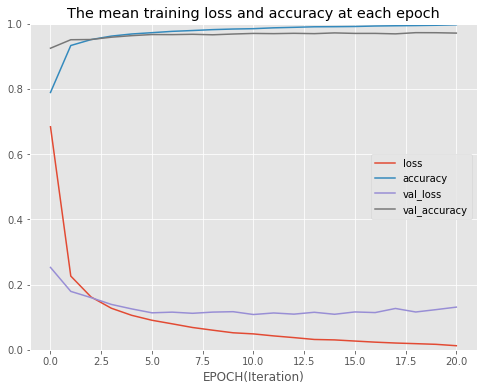

In [51]:
# Using the best model from the randomized searchCV and training it with more epochs to get better accuracy
# Now calling the build function to build the model with the best parameter

checkpoint_cb_best_model = keras.callbacks.ModelCheckpoint('Digits_Sequantial_API.h5',
                                                              save_best_only=True)

# Early stopping the model , if validation accuracy does not see any improvement 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

model_final = build_model(n_layers = 5, n_neurons=77 , 
                learning_rate = 0.01835493714990727 ) 
history_final = model_final.fit(X_train, y_train,
                   epochs=300,
                   callbacks=[checkpoint_cb_best_model, early_stopping_cb],
                   validation_split=0.2,
                   batch_size=32)

plot_loss_analysis(history_final)

In [48]:
# Evaluating the model on the test set
model_final.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.0966 - accuracy: 0.9708


[0.09659114805535646, 0.9708]

In [49]:
# Using the model to make prediction
X_new = X_test[:3]
y_proba = model_final.predict(X_new)

In [50]:
# As you can see the for each instance the model estimates one probability per class from 0 to 9
# ex. in the second case its prob is 100% on index 2 meaning the value is 2 
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# To find the classes with the highest probability use predict_classes
y_pred = model_final.predict_classes(X_new)
y_pred
y_pred_string = np.array(class_names)[y_pred]
y_pred_string               # to use y_pred as index to the class_name list

array(['one', 'one', 'one'], dtype='<U5')

In [20]:
# Here are the actual values of the images using the test set
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

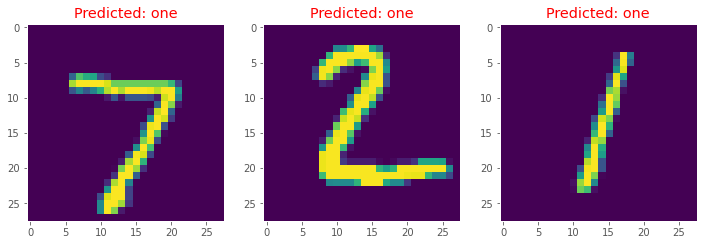

In [21]:
# Here we can see the image with the value it has predicted
fig, ax = plt.subplots(1,3,figsize=(12,6))
for axs,j,k in zip(ax.flat,X_new[:3],[0,1,2]):
    axs.imshow(j)
    axs.grid(False,)
    axs.set_title(f'Predicted: {y_pred_string[k]}',color='red')
plt.show()

In [22]:
# Now lets create a function which will ask for a random number pixel in the test dataset
# and will return its test_data pixel image and the value predicted for it
def get_image(model, X_test, class_names):
    inp = input(f'Input a random index value from the test dataset less than  {len(X_test)} : ' )
    try:
        inp = int(inp)
    except :
        print('The value given is not an integer ')
    if inp > 100000:
        print('The number is greater than 100000')
    else:
        X_new = X_test[inp:inp+1]
        y_pred = model.predict_classes(X_new)
        y_pred_string = np.array(class_names)[y_pred]
        plt.imshow(X_new[0])
        plt.grid(False,)
        plt.title(f'Predicted: {y_pred_string}',color='red')
        plt.show()


Input a random index value from the test dataset less than  10000 : 45


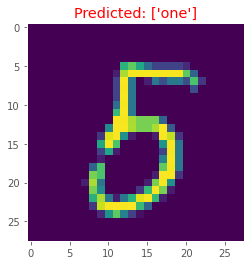

In [23]:
# Calling the function for different with inputting different values of index 
get_image(model, X_test, class_names)